Data preprocessing 

Remember to import human action recognition dataset
For this file the dataset has been imported from kaggle.com

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('health.csv')
df.head(2)

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1


In [10]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


(1215745, 14)

In [11]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [12]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegressionCV
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [13]:
from sklearn.metrics import classification_report, r2_score

step2 importing dataset


In [14]:
df = pd.read_csv('health.csv')
df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [15]:
 df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

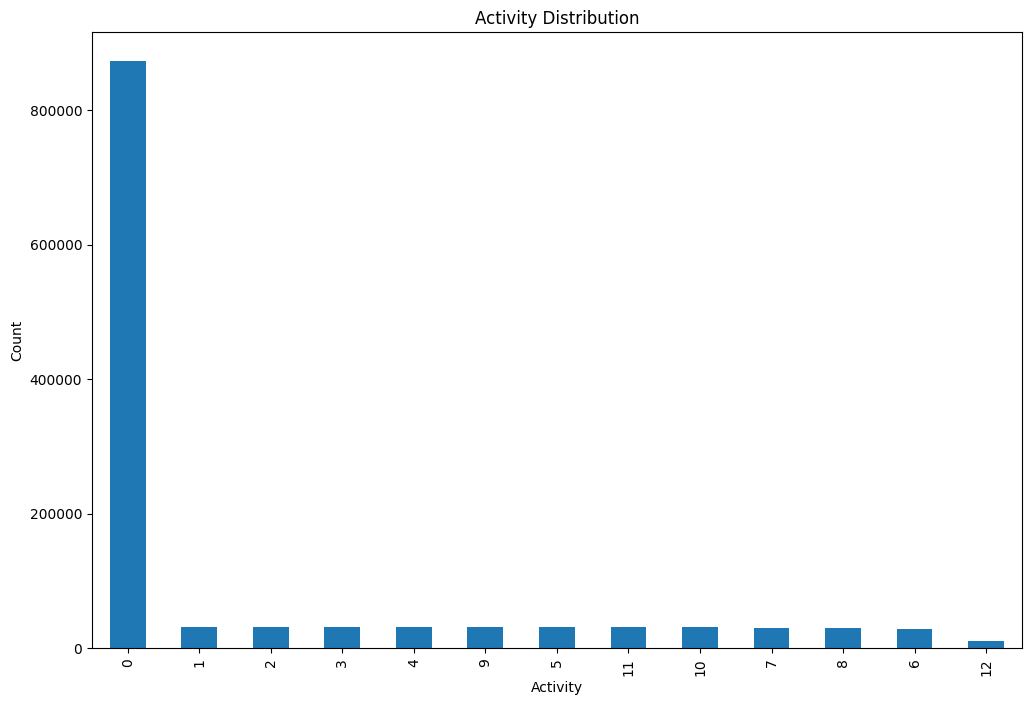

In [16]:

df['Activity'].value_counts().plot(kind='bar', figsize=(12, 8))
plt.title('Activity Distribution')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()

In [17]:
data_activity_0 = df[df['Activity'] == 0]
data_activity_else = df[df['Activity'] != 0]


In [18]:
data_activity_0 = data_activity_0.sample(40000)
df = pd.concat([data_activity_0, data_activity_else])

<Axes: xlabel='Activity'>

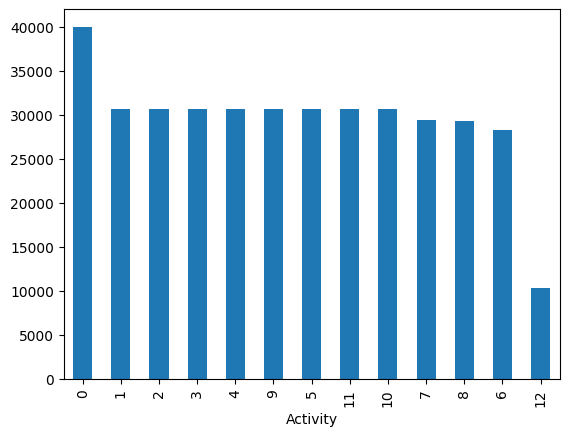

In [19]:
plt.Figure(figsize=(10,8))
df['Activity'].value_counts().plot.bar()

In [20]:
len(df)

383195

In [21]:
activity_label = { 
    0: "None",
    1: "Standing still (1 min)",
    2: "sitting and reelaxing (1 min)",
    3: "lying down (1 min)",
    4: "walking ( 1min)",
    5: "Climbing stairs (1 min)",
    6: "waist bends forward (20x)",
    7: "Frontal elevation of areas (20x)",
    8: "Knees bending (20x)",
    9: "Cycling (1 min)",
    10: "jogging (1 min)",
    11: "Running (1 min)",
    12: "Jump front and back(20x)"
}

==================Standing still (1 min) - a====================
==================Standing still (1 min) - g====================
==================sitting and reelaxing (1 min) - a====================
==================sitting and reelaxing (1 min) - g====================
==================lying down (1 min) - a====================
==================lying down (1 min) - g====================
==================walking ( 1min) - a====================
==================walking ( 1min) - g====================
==================Climbing stairs (1 min) - a====================
==================Climbing stairs (1 min) - g====================
==================waist bends forward (20x) - a====================
==================waist bends forward (20x) - g====================
==================Frontal elevation of areas (20x) - a====================
==================Frontal elevation of areas (20x) - g====================
==================Knees bending (20x) - a====================
========

C:\Users\daksh\AppData\Local\Temp\ipykernel_14156\253901584.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14, 4))


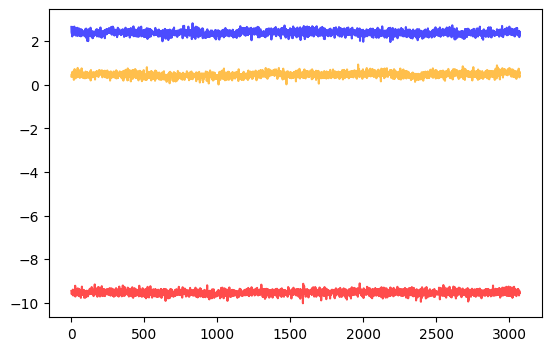

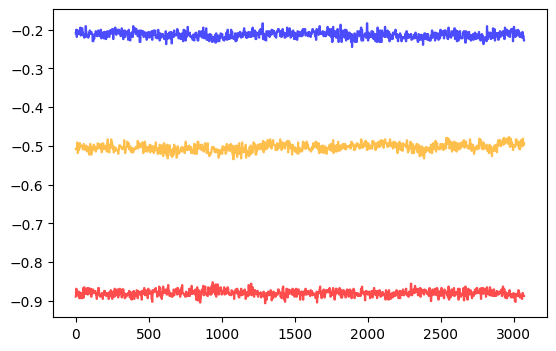

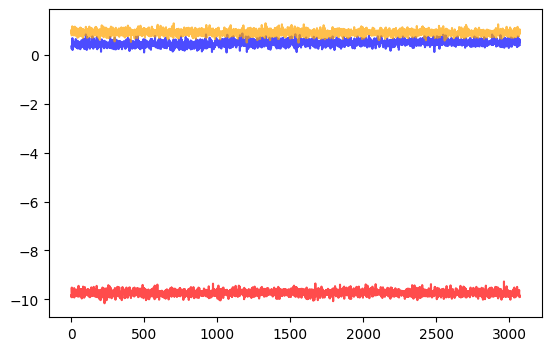

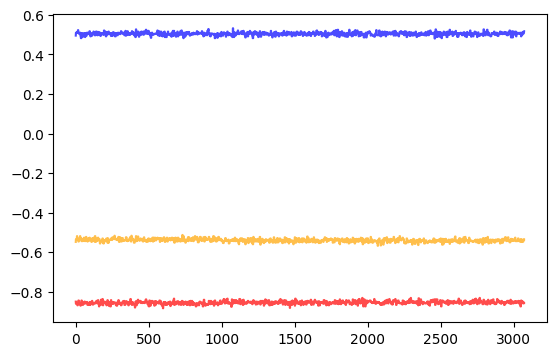

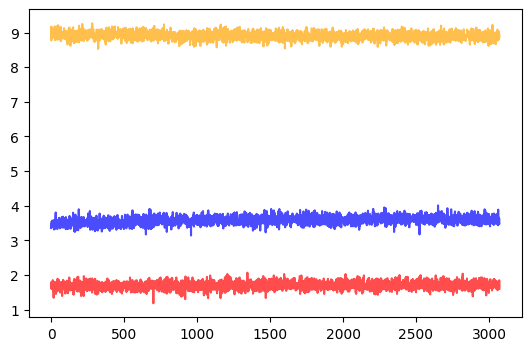

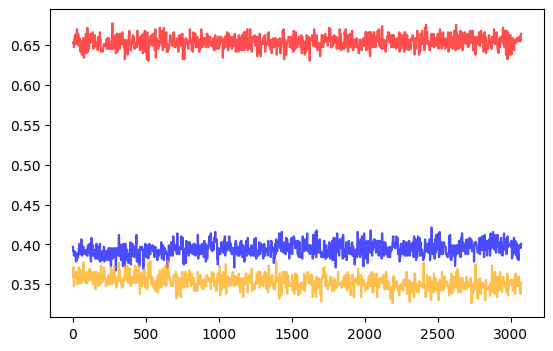

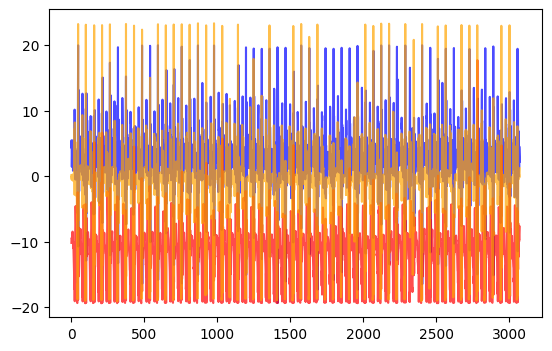

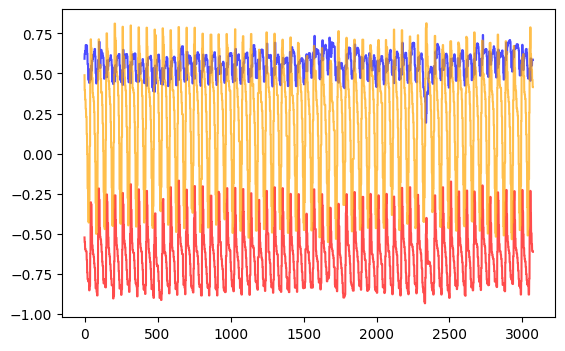

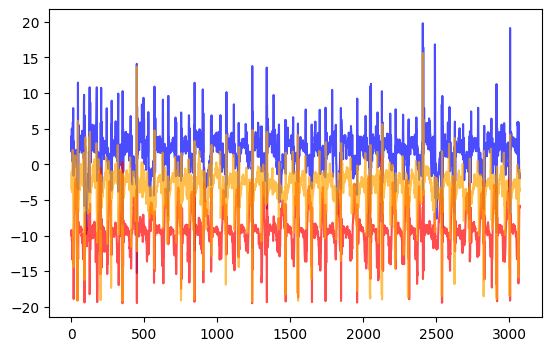

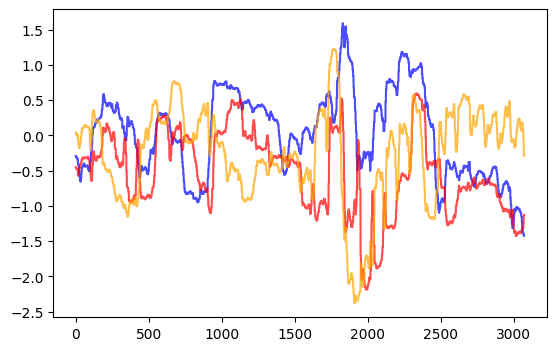

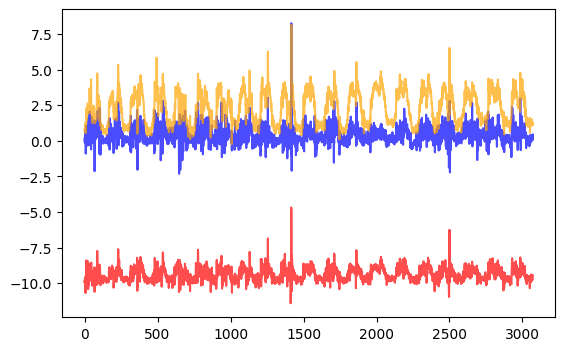

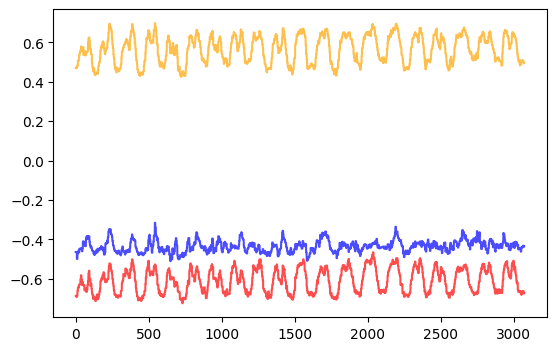

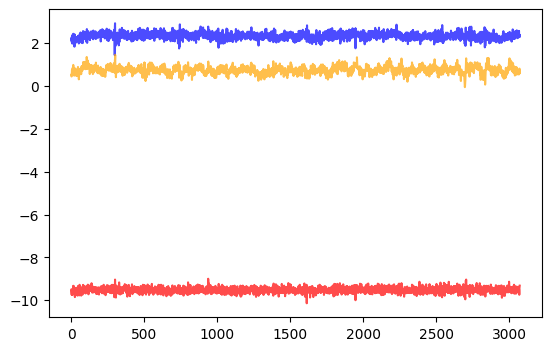

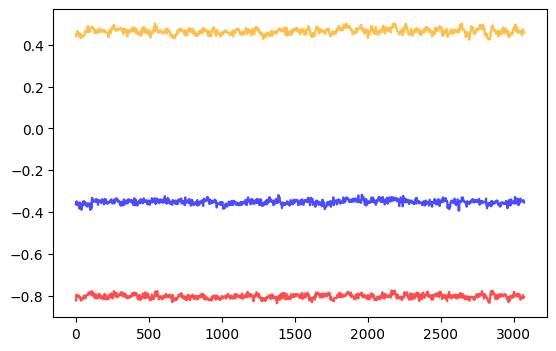

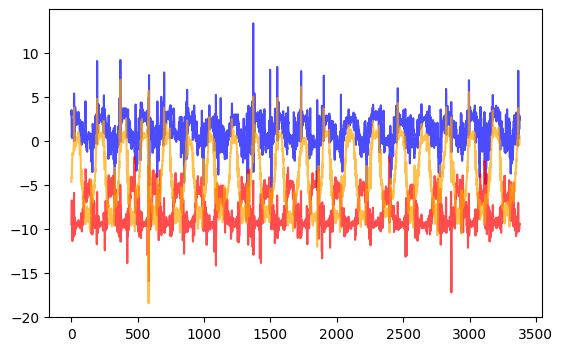

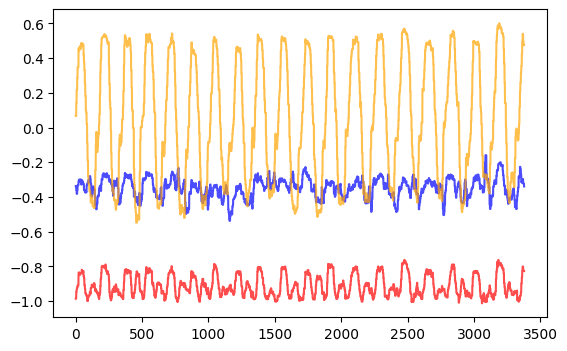

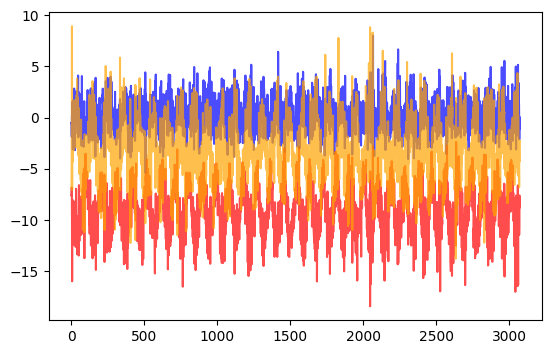

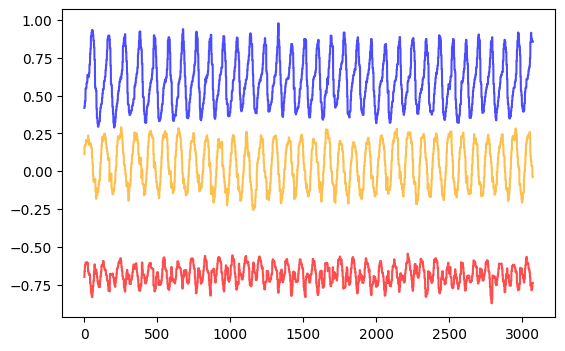

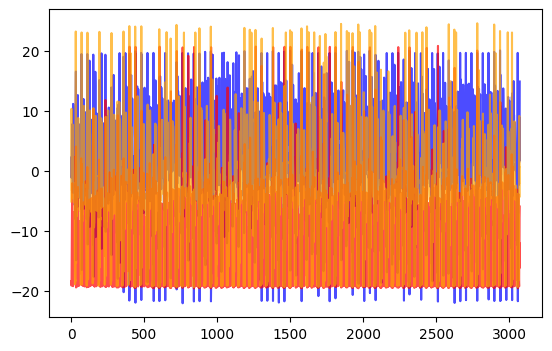

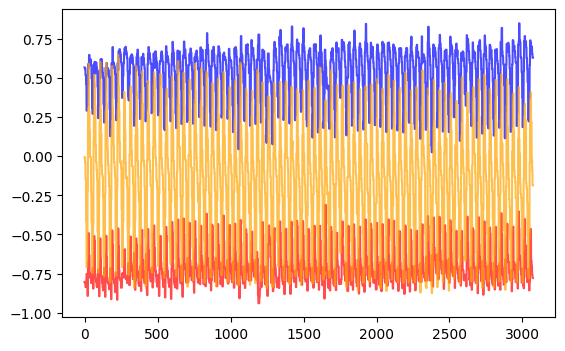

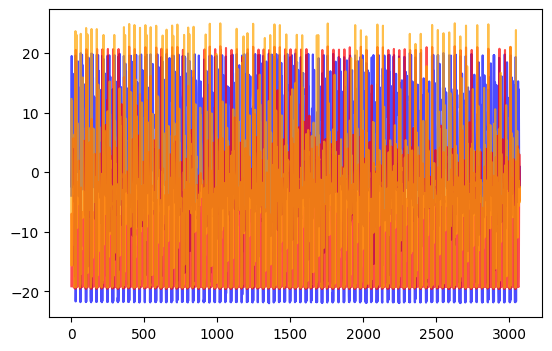

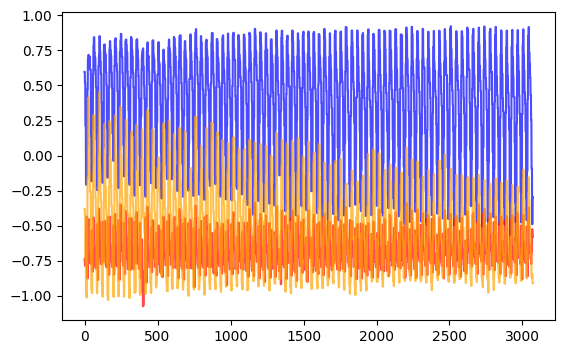

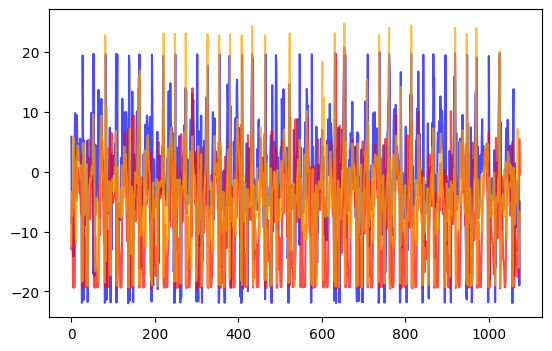

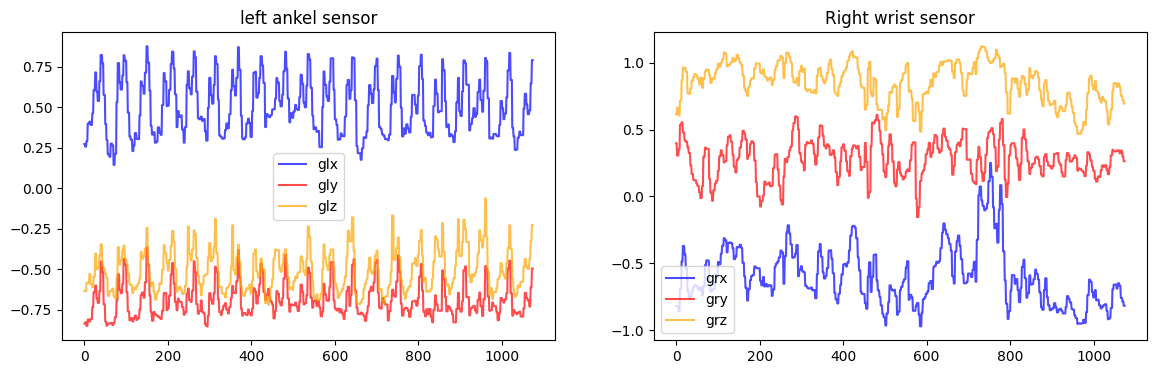

In [22]:
subject1 = df[df['subject'] == 'subject1']
reading = ['a','g']

for i in range (1,13):
    for r in reading:
        print(f"=================={activity_label[i]} - {r}====================")
        plt.figure(figsize=(14, 4))
        plt.subplot(1,2,1)
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True) [r + "lx"],
                 color = 'blue', alpha = 0.7, label = r + "lx")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True) [r + "ly"],
                 color = 'red', alpha = 0.7, label = r + "ly")
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True) [r + "lz"],
                 color = 'orange', alpha = 0.7, label = r + "lz")
plt.title("left ankel sensor")
plt.legend()

plt.subplot(1,2,2)
plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True) [r + "rx"],
         color = 'blue', alpha = 0.7, label = r + "rx")
plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True) [r + "ry"],
         color = 'red', alpha = 0.7, label = r + "ry")
plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True) [r + "rz"],
         color = 'orange', alpha = 0.7, label = r + "rz")
plt.title("Right wrist sensor")
plt.legend()
plt.show()

In [23]:
df['Activity'] = df['Activity'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12],[ "None",
"Standing still (1 min)",
"sitting and reelaxing (1 min)",
"lying down (1 min)",
"walking ( 1min)",
"Climbing stairs (1 min)",
"waist bends forward (20x)",
"Frontal elevation of areas (20x)",
"Knees bending (20x)",
"Cycling (1 min)",
"jogging (1 min)",
"Running (1 min)",
"Jump front and back(20x)"])

In [24]:
df['Activity']

448145                         None
674231                         None
468782                         None
1089947                        None
504611                         None
                     ...           
1213641    Jump front and back(20x)
1213642    Jump front and back(20x)
1213643    Jump front and back(20x)
1213644    Jump front and back(20x)
1213645    Jump front and back(20x)
Name: Activity, Length: 383195, dtype: object

In [25]:
df.Activity.value_counts()

Activity
None                                40000
Standing still (1 min)              30720
sitting and reelaxing (1 min)       30720
lying down (1 min)                  30720
walking ( 1min)                     30720
Cycling (1 min)                     30720
Climbing stairs (1 min)             30720
Running (1 min)                     30720
jogging (1 min)                     30720
Frontal elevation of areas (20x)    29441
Knees bending (20x)                 29337
waist bends forward (20x)           28315
Jump front and back(20x)            10342
Name: count, dtype: int64

<Axes: ylabel='count'>

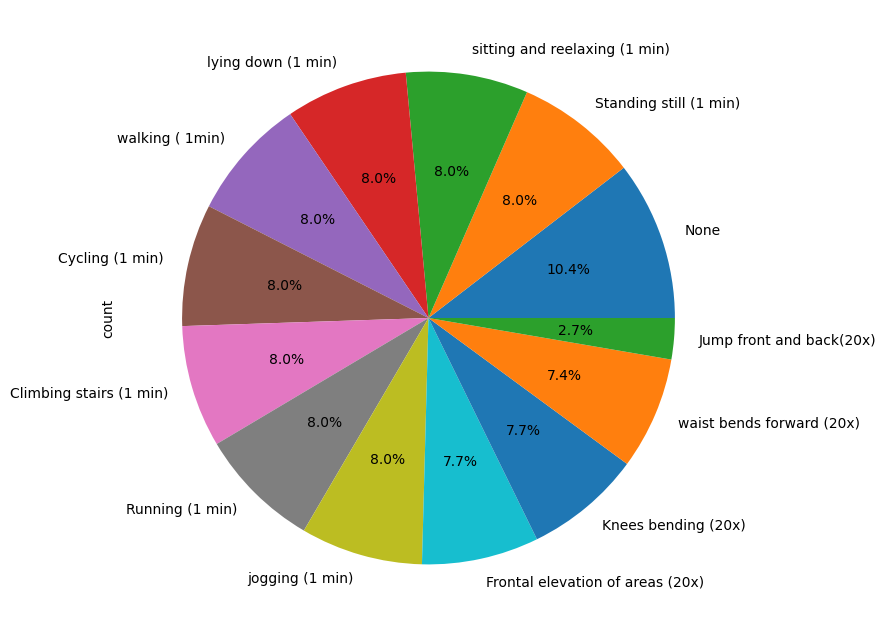

In [26]:
plt.figure(figsize=(12,8))
round(df['Activity'].value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%2.1f%%')

In [27]:
df1 = df.copy()

for feature in df1.columns[:-2]:
    lower_range = np.quantile(df[feature], 0.01)
    upper_range = np.quantile(df[feature], 0.99)
    print(feature, "range", lower_range, 'to', upper_range)
    
    df1 = df1.drop(df1[(df1[feature] > upper_range) | (df1[feature] < lower_range)].index, axis=0)
    print('shape', df1.shape)
    

alx range -11.514119999999998 to 19.223
shape (375541, 14)
aly range -19.378 to 2.3864839999999967
shape (369634, 14)
alz range -18.949 to 14.061299999999989
shape (365825, 14)
glx range -0.75325 to 0.80891
shape (358819, 14)
gly range -1.0638 to 0.96435
shape (352023, 14)
glz range -1.1061 to 0.8290799999999999
shape (346342, 14)
arx range -21.487 to 9.032305999999998
shape (341119, 14)
ary range -18.691 to 11.821059999999997
shape (334901, 14)
arz range -10.26112 to 11.754
shape (332235, 14)
grx range -1.0216 to 0.95294
shape (328627, 14)
gry range -1.1437 to 0.9117
shape (323581, 14)
grz range -0.70905 to 1.125
shape (318919, 14)


In [28]:
le = LabelEncoder()
df["subject"] = le.fit_transform(df['subject'])
df["Activity"] = le.fit_transform(df['Activity'] )


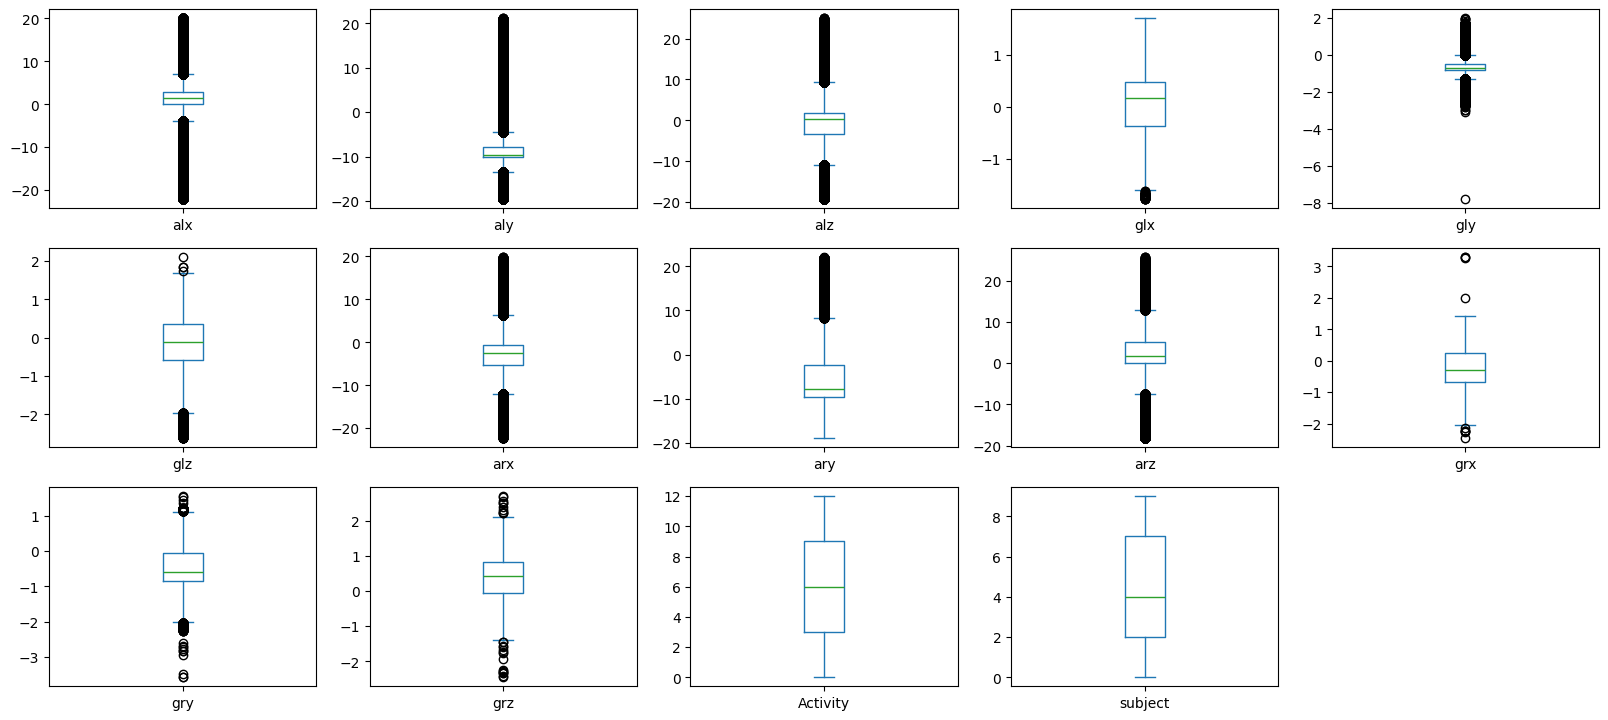

In [29]:
df.plot(kind='box', subplots=True, layout =(5,5), figsize=(20,15))
plt.show()


In [30]:
x = df.drop(['Activity','subject'], axis=1).values
y = df['Activity'].values

In [31]:
df.shape

(383195, 14)

In [32]:
from sklearn.preprocessing import RobustScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
ro_scaler = RobustScaler().fit(x_train)
x_train_scaled = ro_scaler.transform(x_train)
x_test_scaled = ro_scaler.transform(x_test)


Building Model

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def resultsuummerizer(y_true, y_pred, cm_en = True):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    if cm_en:  
        plt.figure(figsize=(15, 15))
        sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=activity_label.values(), yticklabels=activity_label.values())  
        plt.title('Confusion Matrix')
        plt.show()
    print(f'accuracy score: '+ '{:.4%}'.format(acc ))
    print(f'precision score: '+ '{:.4%}'.format(prec ))
    print(f'recall score: '+ '{:.4%}'.format(rec ))
    print(f'f1 score: '+ '{:.4%}'.format(f1))
    

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\daksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
lr.score(x_train, y_train)

0.5438245487063146

In [36]:
lr.score(x_test, y_test)

0.5464357665528867

In [37]:
lr2 = LogisticRegression()
lr2.fit(x_train_scaled, y_train)

C:\Users\daksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
lr2.score(x_train_scaled, y_train)

0.5482609361299392

In [39]:
lr2.score(x_test_scaled, y_test)

0.5506738066159355

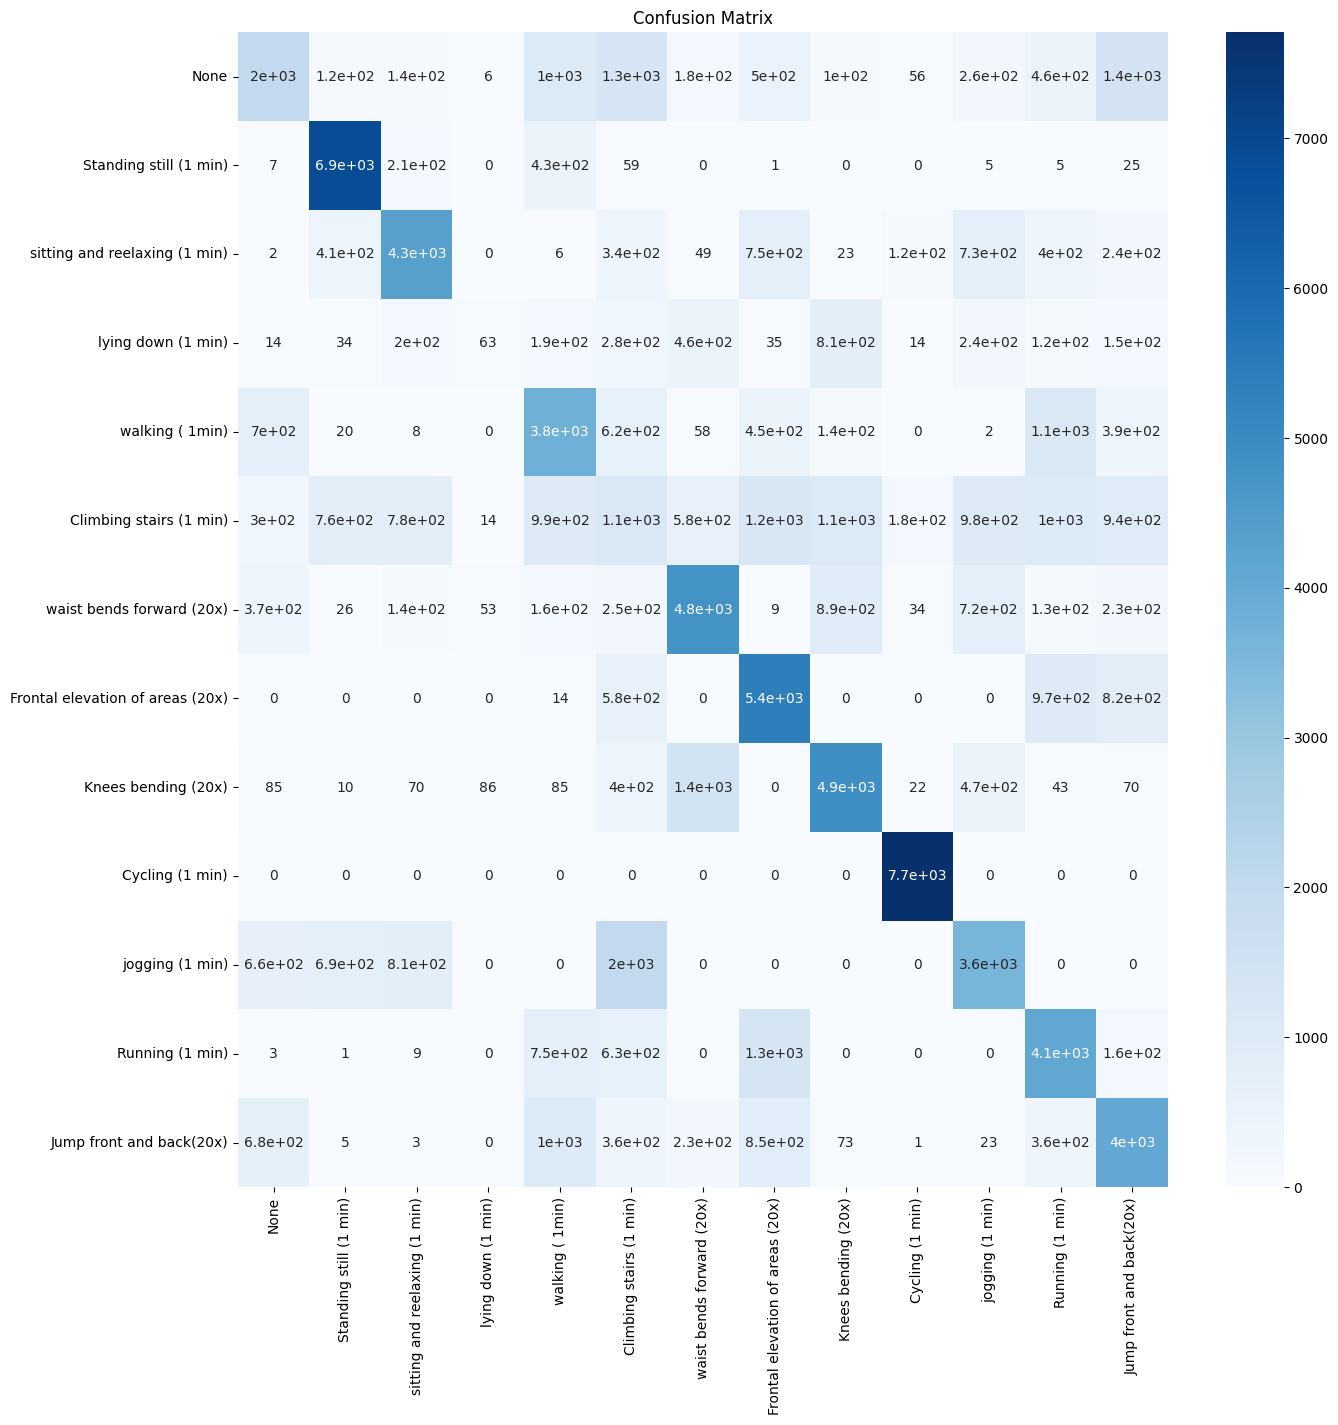

accuracy score: 55.0674%
precision score: 52.7290%
recall score: 53.3655%
f1 score: 51.8096%


In [40]:
# Generate predictions using the logistic regression model
y_pred_lr = lr2.predict(x_test_scaled)


# Summarize the results
resultsuummerizer(y_test, y_pred_lr, cm_en=True)



KNN


In [41]:
knn1 = KNeighborsClassifier(n_neighbors= 5)
knn1.fit(x_train,y_train)


KNeighborsClassifier()

In [42]:
y_pred_knn = knn1.predict(x_test)


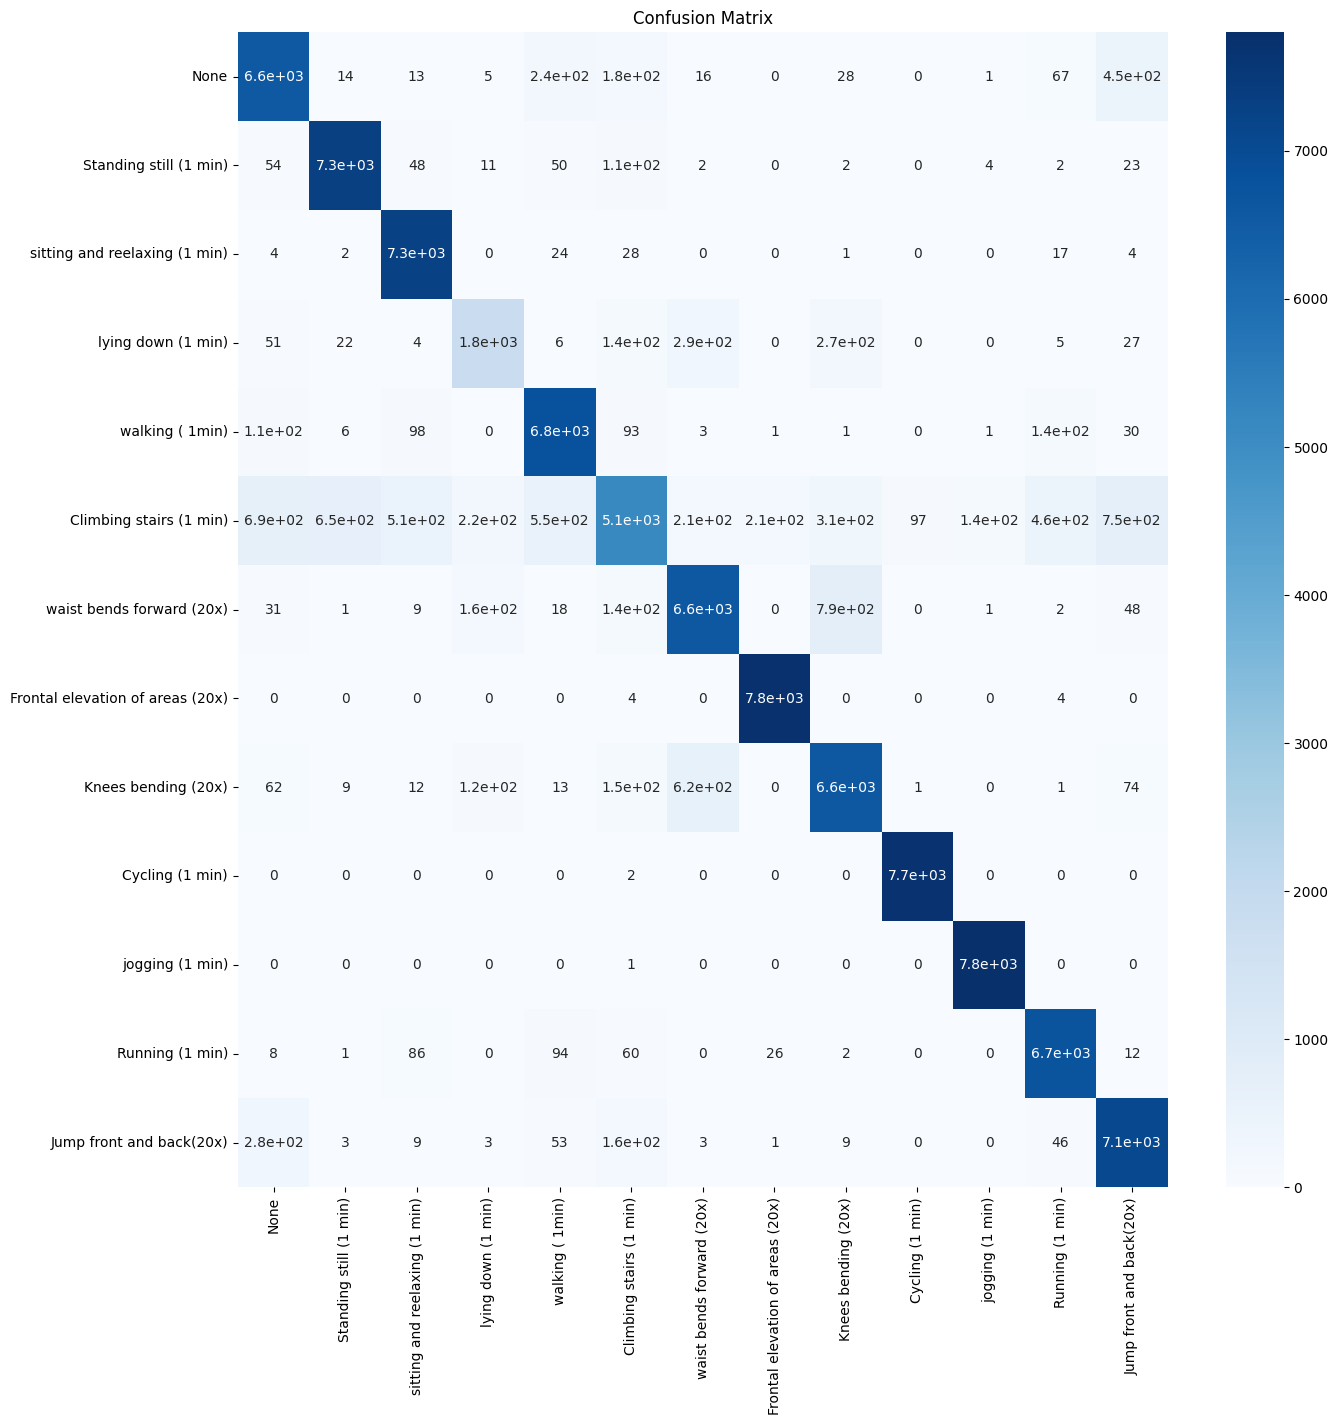

accuracy score: 88.9206%
precision score: 88.2211%
recall score: 88.8100%
f1 score: 88.1554%


In [43]:
resultsuummerizer(y_test, y_pred_knn)

In [44]:
knn2 = KNeighborsClassifier(n_neighbors= 5)
knn2.fit(x_train_scaled,y_train)
y_pred_knn2 = knn2.predict(x_test_scaled)




In [45]:
resultsuummerizer(y_test, y_pred_knn2, cm_en = False)


accuracy score: 93.9498%
precision score: 93.6661%
recall score: 93.7604%
f1 score: 93.4135%


In [47]:
for n in range (1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train_scaled,y_train)
    y_pred = knn.predict(x_test_scaled)
    print(f"n=================No of neighbours : {n}====================\n")
    resultsuummerizer(y_test, y_pred, cm_en = False)

n=================No of neighbours : 1====================

accuracy score: 93.9916%
precision score: 93.6712%
recall score: 93.7942%
f1 score: 93.6442%
n=================No of neighbours : 2====================

accuracy score: 93.2640%
precision score: 92.7791%
recall score: 93.4704%
f1 score: 93.0405%
n=================No of neighbours : 3====================

accuracy score: 94.2275%
precision score: 93.8251%
recall score: 94.1189%
f1 score: 93.7420%
n=================No of neighbours : 4====================

accuracy score: 94.1148%
precision score: 93.7607%
recall score: 94.0820%
f1 score: 93.6747%
n=================No of neighbours : 5====================

accuracy score: 93.9498%
precision score: 93.6661%
recall score: 93.7604%
f1 score: 93.4135%
n=================No of neighbours : 6====================

accuracy score: 93.8152%
precision score: 93.5061%
recall score: 93.6768%
f1 score: 93.2754%
n=================No of neighbours : 7====================

accuracy score: 93.633

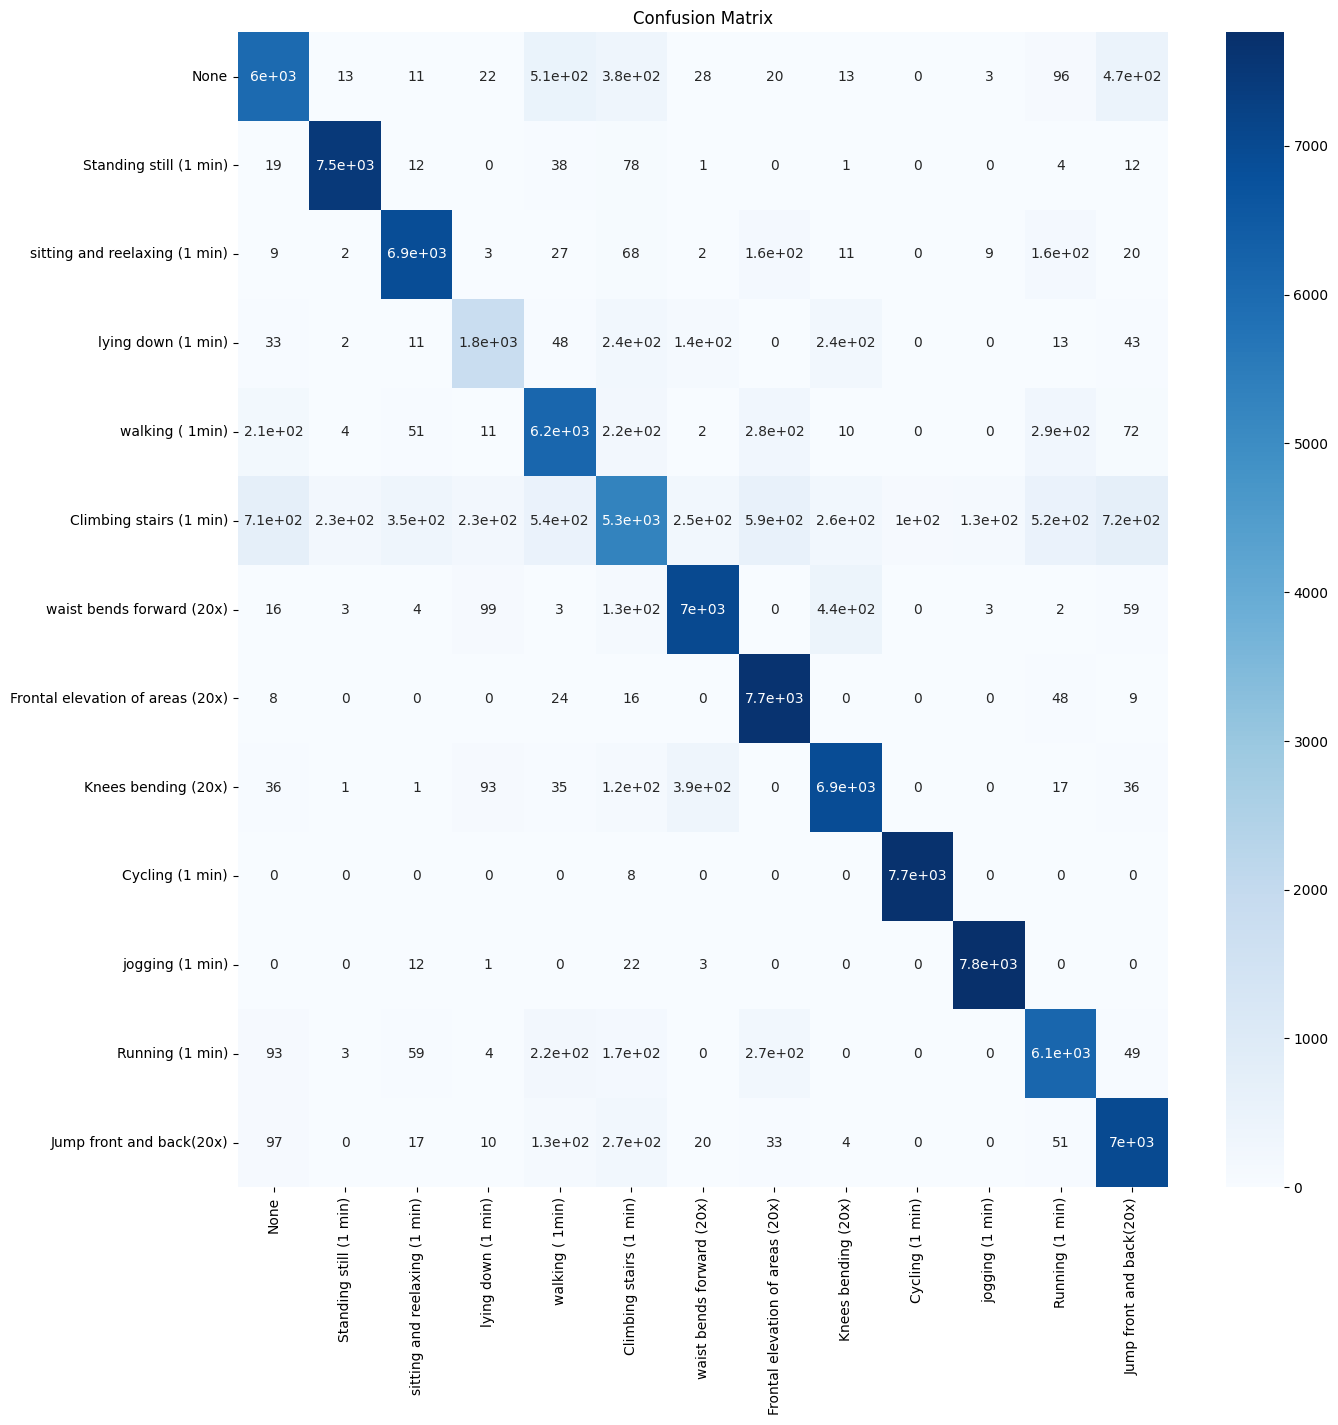

accuracy score: 87.5876%
precision score: 87.0828%
recall score: 87.4375%
f1 score: 87.0175%


In [48]:
dt = DecisionTreeClassifier(max_depth=14)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
resultsuummerizer(y_test, y_pred_dt)

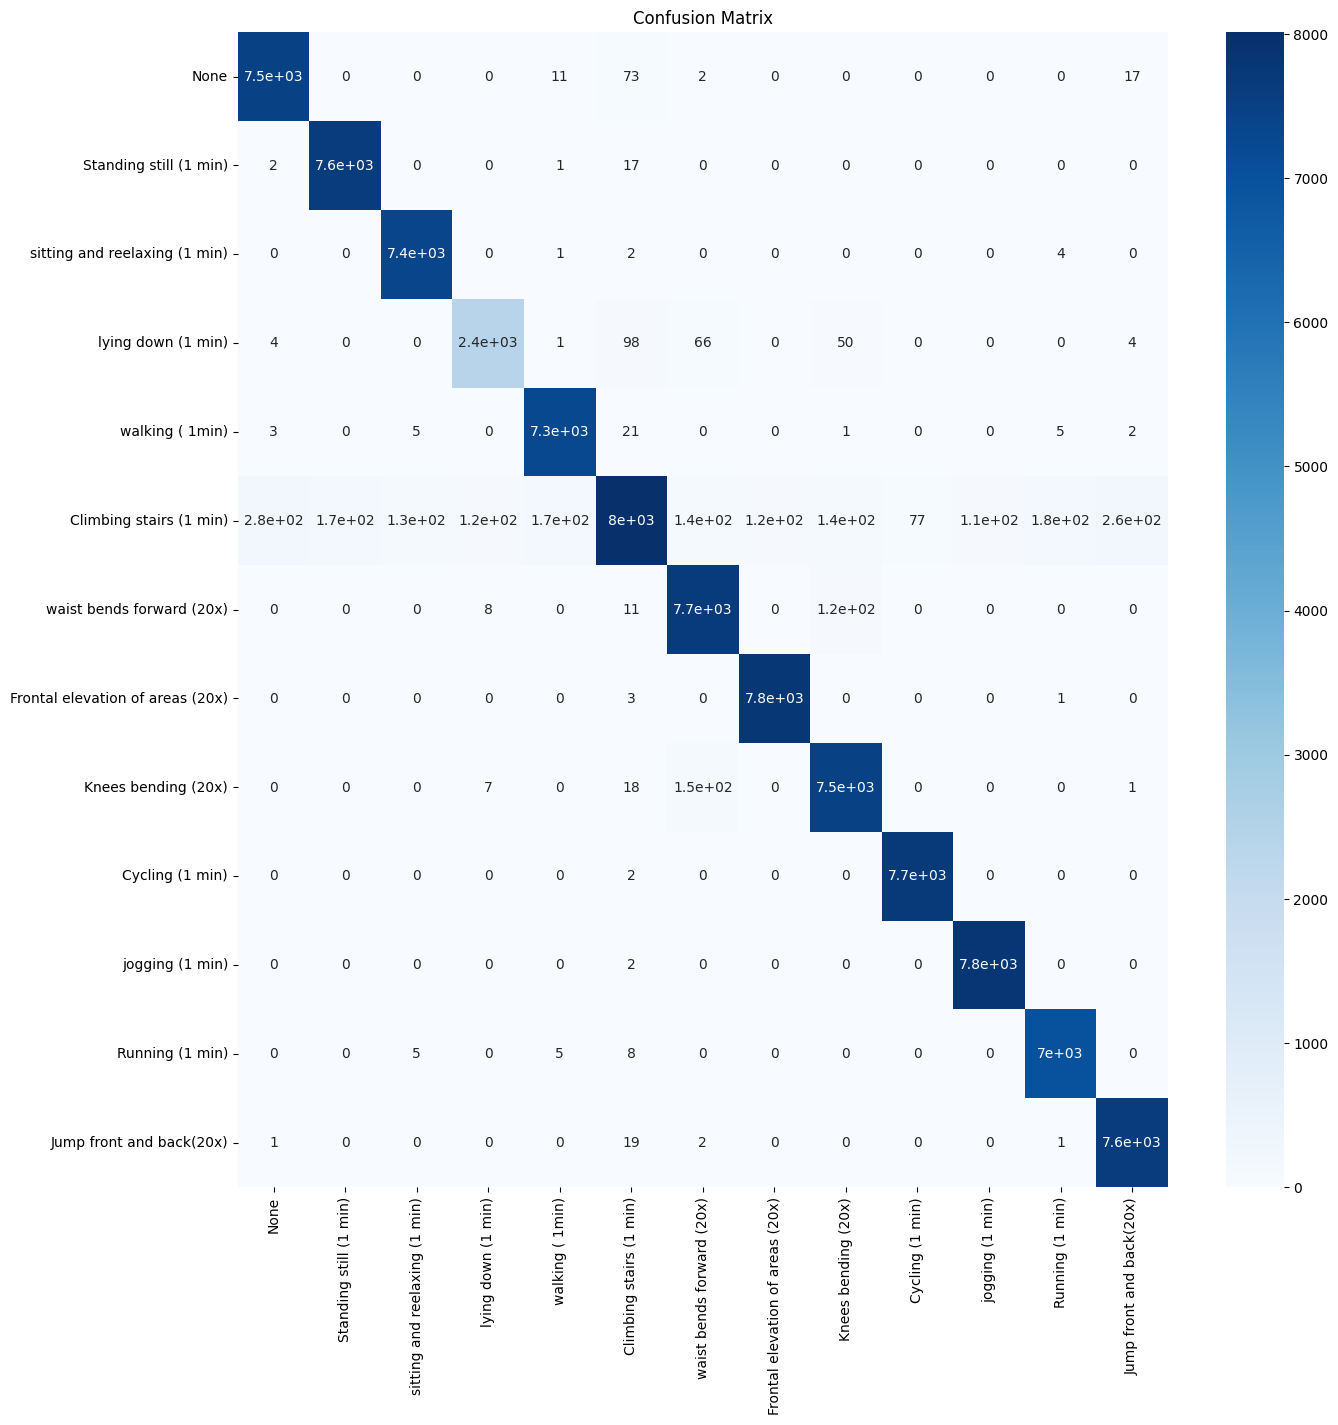

accuracy score: 97.2327%
precision score: 97.1057%
recall score: 97.3383%
f1 score: 97.1556%


In [49]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
resultsuummerizer(y_test, y_pred_rf)

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
